In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv('pharma_dataset.csv')
print(data.head())

  drug_id  drug_name therapeutic_area   molecule_type  launch_year  \
0   D0103   Immunexa         Oncology  Small Molecule         2010   
1   D0180  Diabetrol       Cardiology        Biologic         2020   
2   D0093  ArthroAid         Oncology      Biosimilar         2011   
3   D0015  Diabetrol      Pulmonology  Small Molecule         2004   
4   D0107  ArthroAid         Diabetes      Biosimilar         2022   

          region month_year  units_sold  drug_price  competitor_1_price  ...  \
0         Europe    01-2021         228      419.81              450.68  ...   
1  North America    01-2021         199      376.51              447.60  ...   
2          LATAM    01-2021         208      426.35              488.72  ...   
3  North America    01-2021         180       50.66              356.10  ...   
4          LATAM    01-2021         210       35.18              261.10  ...   

   insurance_coverage  hospital_tier  doctor_visits marketing_spend  \
0                  47      

In [4]:
print(data.isnull().sum())

drug_id                 0
drug_name               0
therapeutic_area        0
molecule_type           0
launch_year             0
region                  0
month_year              0
units_sold              0
drug_price              0
competitor_1_price      0
competitor_2_price      0
competitor_3_price      0
insurance_coverage      0
hospital_tier           0
doctor_visits           0
marketing_spend         0
rep_visits              0
regulatory_flags        0
adverse_events          0
patient_income_level    0
total_revenue           0
market_share            0
dtype: int64


In [5]:
print(data.describe())

       launch_year  units_sold   drug_price  competitor_1_price  \
count  1500.000000  1500.00000  1500.000000         1500.000000   
mean   2011.628667   200.08600   259.208640          255.871213   
std       6.538344    14.42026   136.462937          138.252621   
min    2000.000000   150.00000    20.090000           20.490000   
25%    2006.000000   190.00000   143.980000          141.925000   
50%    2012.000000   200.00000   261.465000          252.115000   
75%    2017.000000   210.00000   373.632500          375.020000   
max    2022.000000   254.00000   499.760000          499.830000   

       competitor_2_price  competitor_3_price  insurance_coverage  \
count         1500.000000           1500.0000         1500.000000   
mean           263.208953            259.8717           68.870667   
std            137.701125            138.7295           17.267756   
min             20.060000             20.1200           40.000000   
25%            144.560000            139.1475      

In [8]:
import plotly.express as px

# Revenue distribution histogram
fig = px.histogram(data,
                   x='total_revenue',
                   nbins=20,
                   title='Distribution of Monthly Revenue (Pharma Drugs)')
fig.show()


In [10]:
import plotly.express as px

# Box plot of drug price distribution
fig = px.box(data,
             y='drug_price',
             title='Box Plot of Drug Prices')
fig.show()


In [11]:
import plotly.express as px

# Box plot of revenue distribution by therapeutic area
fig = px.box(data,
             x='therapeutic_area',
             y='total_revenue',
             title='Revenue Distribution by Therapeutic Area',
             color='therapeutic_area')
fig.show()


In [12]:
# Box plot of revenue distribution by region
fig = px.box(data,
             x='region',
             y='total_revenue',
             title='Revenue Distribution by Region',
             color='region')
fig.show()


In [13]:
fig = px.scatter(data,
                 x='units_sold',
                 y='total_revenue',
                 title='Units Sold vs Total Revenue',
                 trendline="ols")
fig.show()


In [15]:
fig = px.bar(data,
             x='therapeutic_area',
             y='total_revenue',
             title='Average Revenue by Therapeutic Area',
             color='therapeutic_area')
fig.show()


In [16]:
# Convert month_year to datetime (taking first day of month for simplicity)
data['date'] = pd.to_datetime(data['month_year'], format='%m-%Y', errors='coerce')

# Extract weekday name
data['weekday'] = data['date'].dt.day_name()

# Box plot of revenue by weekday
fig = px.box(data,
             x='weekday',
             y='total_revenue',
             title='Box Plot of Total Revenue by Weekday')
fig.show()


In [18]:
import plotly.graph_objects as go

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap
fig = go.Figure(go.Heatmap(
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    z=correlation_matrix.values,
    zmin=-1, zmax=1
))
fig.update_layout(title='Correlation Heatmap of Pharma Numerical Features')
fig.show()


In [19]:
data['avg_competitor_price'] = data[['competitor_1_price', 'competitor_2_price', 'competitor_3_price']].mean(axis=1)
data['comp_price_diff'] = data['drug_price'] - data['avg_competitor_price']
avg_price_diff_by_area = data.groupby('therapeutic_area')['comp_price_diff'].mean().reset_index()
import plotly.express as px
fig = px.bar(avg_price_diff_by_area,
             x='therapeutic_area',
             y='comp_price_diff',
             title='Average Competitor Price Difference by Therapeutic Area')
fig.update_layout(
    xaxis_title='Therapeutic Area',
    yaxis_title='Average Competitor Price Difference'
)
fig.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = data[['units_sold', 'drug_price', 'avg_competitor_price',
          'marketing_spend', 'comp_price_diff']]
y = data['total_revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [21]:
import plotly.graph_objects as go

# Predictions
y_pred = model.predict(X_test)

# Scatter plot: Predicted vs Actual Revenue
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test, y=y_pred, mode='markers',
    marker=dict(color='blue'),
    name='Predicted vs. Actual Revenue'
))

# Ideal prediction line (perfect fit)
fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Ideal Prediction'
))

fig.update_layout(
    title='Predicted vs. Actual Pharma Revenue',
    xaxis_title='Actual Revenue',
    yaxis_title='Predicted Revenue'
)
fig.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1084.29
Root Mean Squared Error (RMSE): 1535.99
R² Score: 1.00


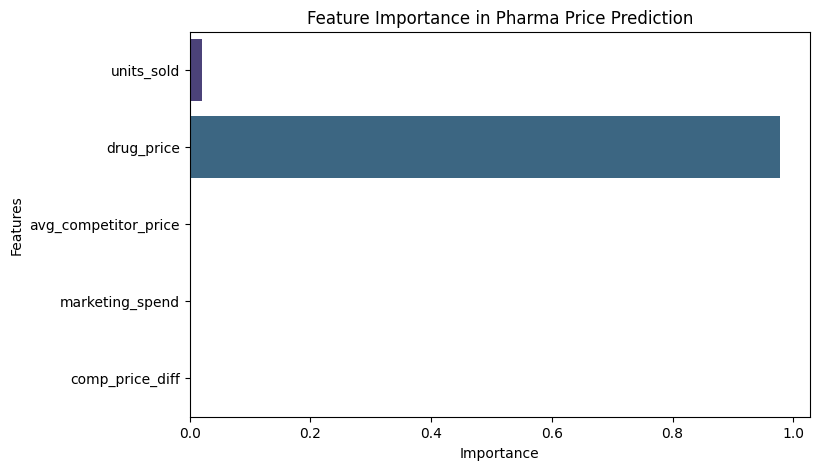

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, hue=features, palette="viridis", dodge=False, legend=False)
plt.title("Feature Importance in Pharma Price Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
